In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from params import *

In [2]:
# rate_array = np.zeros((n_states,n_states))
# rate_array[0][1] = 0.45  # S -> A
# rate_array[1][2] = 0.205 # A -> I
# rate_array[1][3] = 0.136 # A -> R
# rate_array[2][3] = 0.1   # I -> R
# rate_array[2][4] = 0.25  # I -> H
# rate_array[4][3] = 0.1   # H -> R

# Cpars = np.array([0,  1,  1,  0,  0.1,  1],dtype=np.float64)

In [3]:
def an_soln(rate,Cpars,n0,T_max):
    
    n = np.copy(n0)
     
    N = np.sum(n0)
    print(N)
    t = np.linspace(0, T_max, T_max)# A grid of time points (in days)
    
    #########################################

    # The differential equations ############
    
    print(rate[0][1])
    print(rate[1][2])
    print(rate[1][3])
    print(rate[2][3])
    print(rate[2][4])
    print(rate[4][3])
    
    def deriv(y, t):
        [S, A, I, R, H] = y
        dSdt = - rate[0][1] * S * (Cpars[1]*A + Cpars[2]*I + Cpars[4]*H)/(N-H)
        dAdt = + rate[0][1] * S * (Cpars[1]*A + Cpars[2]*I + Cpars[4]*H)/(N-H) - (rate[1][2]+rate[1][3]) * A
        dIdt = + rate[1][2] * A - (rate[2][3] + rate[2][4]) * I
        dHdt = + rate[2][4] * I - rate[4][3] * H
        dRdt = + rate[1][3] * A + rate[2][3] * I + rate[4][3] * H
#         print(dSdt+dAdt+dIdt+dHdt+dRdt)
        return dSdt, dAdt, dIdt, dRdt, dHdt
    
    #########################################
    
    print(rate)
    
    y0 = n                              # Initial conditions vector
    ret = odeint(deriv, y0, t) # Integrate the SIR equations over the time grid, t.
    
    S, A, I, R, H = ret.T                                   # Return the transpose of the matrix

    return t, S/N, A/N, I/N, R/N, H/N

In [4]:
rate = np.copy(rate_array)

t,s,a,i,r,h = an_soln(rate, Cpars, n0, 120)

10000
0.45
0.205
0.136
0.1
0.25
0.1
[[0.    0.45  0.    0.    0.   ]
 [0.    0.    0.205 0.136 0.   ]
 [0.    0.    0.    0.1   0.25 ]
 [0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.1   0.   ]]


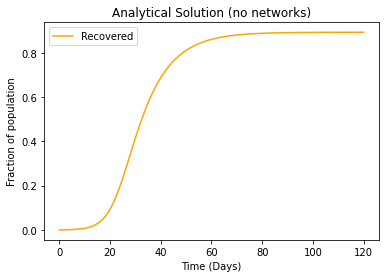

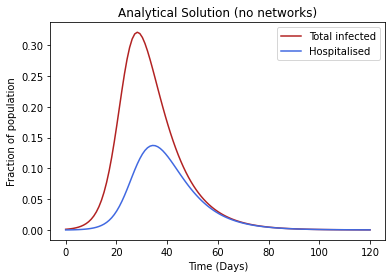

In [9]:
plt.title("Analytical Solution (no networks)")
plt.plot(t,r,'orange', label="Recovered")
plt.ylabel("Fraction of population")
plt.xlabel("Time (Days)")
plt.legend()
plt.savefig("./analytic_res_recovered.png",dpi=100,facecolor='w')
plt.show()

plt.title("Analytical Solution (no networks)")
plt.plot(t,i+a+h,'firebrick',label="Total infected")
plt.plot(t,h,'royalblue',label="Hospitalised")
plt.ylabel("Fraction of population")
plt.xlabel("Time (Days)")
plt.legend()
plt.savefig("./analytic_res_totalinf.png",dpi=100,facecolor='w')
plt.show()

In [6]:
print(r[-1])

0.8929463547446341


In [7]:
0.3*10000

3000.0